# 1. 卷积运算（convolution）
$f(x)$和$g(x)$是两个连续函数，那么卷积定义为：
$$h(x)=(f*g)(x)=\int_{-\infty}^{\infty}f(u)g(x-u)du$$
若$f[n]$和$g[n]$是两个数列，那么卷积定义为：
$$h[n]=(f*g)[n]=\sum_{u=-\infty}^{\infty}f[u]g[n-u]$$
**$h(x)$称为$g(x)$的卷积**。$f$称为卷积核，$g$是被卷函数（或者数列）。
假设$f$和$g$的定义如下：
$$f=\{1,1,1\}\\g=\{2,3,2,6\}$$
计算如下：
\begin{equation*}
\begin{split}
&h[n]=(f*g)[n]=f[1]g[n-1]+f[2]g[x-2]+f[3]g[n-3]\\
&h[1]=(f*g)[1]=f[1]g[1-1]+f[2]g[1-2]+f[3]g[1-3]=unkown\\
&h[2]=(f*g)[2]=f[1]g[2-1]+f[2]g[2-2]+f[3]g[2-3]=2\\
&h[3]=(f*g)[3]=f[1]g[3-1]+f[2]g[3-2]+f[3]g[3-3]=5\\
&h[4]=(f*g)[4]=f[1]g[4-1]+f[2]g[4-2]+f[3]g[4-3]=7\\
&h[5]=(f*g)[5]=f[1]g[5-1]+f[2]g[5-2]+f[3]g[5-3]=11\\
&h[6]=(f*g)[6]=f[1]g[6-1]+f[2]g[6-2]+f[3]g[6-3]=8\\
&h[7]=(f*g)[7]=f[1]g[7-1]+f[2]g[7-2]+f[3]g[7-3]=6\\
&h[8]=(f*g)[8]=f[1]g[8-1]+f[2]g[8-2]+f[3]g[8-3]=unkown\\
\end{split}
\end{equation*}
在计算中，如果下标超过数列的范围(例如出现$g[-1]$或者$g[5]$)，设定该值为0。按照该规则，$h[2]-h[7]$能够计算出值。取$h[2]-h[7]$构成新的数列：
$$h=\{2,5,7,11,8,6\}$$
这就是$f*g$的结果。

In [1]:
import numpy as np
f=np.array([1,1,1])
g=np.array([2,3,2,6])
fg=np.convolve(f,g)
print(fg)

[ 2  5  7 11  8  6]


# 2.卷积与加权和
程序员懒得再写一个加权求和函数，因此往往用卷积替代。或者反过来，卷积计算用加权和替代。
有一个数列$g$，程序希望按照如下方式对数列中的数据进行处理：
$$g[n]'=2*g[n-1]+3*g[n]+4*g[n+1]$$

In [12]:
import numpy as np
g=np.array([1,2,3,4])
g=np.array([0,1,2,3,4,0]) #边界补0
h=np.zeros(g.shape)
for i  in range(0,g.shape[0]-1):
    h[i]=2*g[i-1]+3*g[i]+4*g[i+1] #因为边界补0，此处不用考虑边界条件
print(h)
print(h[1:-1])

[ 4. 11. 20. 29. 18.  0.]
[11. 20. 29. 18.]


In [5]:
import numpy as np
f=np.array([4,3,2]) #根据卷积计算公式，权重顺序颠倒
g=np.array([1,2,3,4])
h=np.convolve(f,g) #用卷积替代
print(h)

[ 4 11 20 29 18  8]


In [7]:
import numpy as np
f=np.array([4,3,2]) #根据卷积计算公式，权重顺序颠倒
g=np.array([1,2,3,4])
h=np.convolve(f,g,mode='same') #用卷积替代
print(h)

[11 20 29 18]


# 3.相关运算（Correlation）
相关运算才是真正的加权和
**注意：程序员口中的卷积其实相关，它的数学公式与卷积不同。**
$$h[n]=(f\star g)[n]=\sum_{u=-\infty}^{\infty}f[u]g[n+u]$$

In [191]:
import numpy as np
f=np.array([2,3,4]) 
g=np.array([1,2,3,4])
h=np.correlate(g,f,mode='same') #相关运算，权重不颠倒,但f和g的顺序颠倒，详见帮助
print(h)

[11 20 29 18]


# 4.用卷积（相关）替代加权和

In [2]:
import numpy as np
f=np.array([1,1,1]) #卷积核
g=np.array([1,2,3,4])
h=np.convolve(f,g,mode='same')
print(h)

[3 6 9 7]


In [195]:
import numpy as np
f=np.array([1,1,1]) 
g=np.array([1,2,3,4])
h=np.correlate(g,f,mode='same') #注意参数顺序和卷积相反
print(h)

[3 6 9 7]


In [188]:
import numpy as np
f=np.array([1/3,1/3,1/3]) #卷积核
g=np.array([1,2,3,4])
h=np.convolve(f,g,mode='same')
print(h)

[1.         2.         3.         2.33333333]


In [198]:
import numpy as np
f=np.array([1/3,1/3,1/3]) #卷积核
g=np.array([1,2,3,4])
h=np.correlate(g,f,mode='same') #注意参数顺序和卷积相反
print(h)

[1.         2.         3.         2.33333333]


# 5.用卷积（相关）求导数

In [1]:
import numpy as np
f=np.array([1,-1,0]) #卷积核
g=np.array([1,2,3,4])
h=np.convolve(f,g,mode='same')
print(h)

[ 1  1  1 -4]


In [3]:
import numpy as np
f=np.array([-1,1,0]) #卷积核
g=np.array([1,2,3,4])
h=np.correlate(g,f,mode='same') #注意参数顺序和卷积相反
print(h)

[1 1 1 1]


In [201]:
import numpy as np
f=np.array([1,-1,0]) #卷积核
g=np.array([1,2,3,4])
h=np.convolve(f,g,mode='same')
h=np.convolve(f,h,mode='same') #二阶导数
print(h)

[ 0  0 -5  4]


In [200]:
import numpy as np
f=np.array([-1,1,0]) #卷积核
g=np.array([1,2,3,4])
h=np.correlate(g,f,mode='same') #注意参数顺序和卷积相反
h=np.correlate(h,f,mode='same') #注意参数顺序和卷积相反
print(h)

[1 0 0 0]


# 6.卷积（相关）加速算法
给定$m\times n$的数组$A$，按照如下公式求$A'$:
$$A(i,j)'=\frac{1}{\sum_{k_1=-1}^{1}\sum_{k_2=-1}^{1}A(i+k_1,j+k_2)}$$

In [1]:
import numpy as np
m=5000
n=5000
A=np.random.randint(0,10,size=(m,n))
B=np.zeros((m,n),dtype=np.float32)
for i in range(m):
    for j in range(n):
        for k1 in range(-1,2):
            for k2 in range(-1,2):
                if i+k1>=0 and i+k1<m and j+k2>=0 and j+k2<n:
                    B[i,j]+=A[i+k1,j+k2]
        B[i,j]=1/B[i,j]
print(A)
print(B)

<ipython-input-1-65b29acf2c36>:12: RuntimeWarning: divide by zero encountered in true_divide
  B[i,j]=1/B[i,j]


[[0 8 2 ... 8 3 5]
 [5 1 0 ... 5 9 7]
 [1 4 3 ... 8 2 6]
 ...
 [6 6 4 ... 5 6 0]
 [9 7 5 ... 6 0 5]
 [0 5 5 ... 1 4 0]]
[[0.07142857 0.0625     0.0625     ... 0.02777778 0.02702703 0.04166667]
 [0.05263158 0.04166667 0.03571429 ... 0.01851852 0.01886792 0.03125   ]
 [0.04166667 0.03030303 0.02941176 ... 0.01639344 0.01612903 0.025     ]
 ...
 [0.02631579 0.01886792 0.01754386 ... 0.025      0.02439024 0.04761905]
 [0.03030303 0.0212766  0.02       ... 0.02941176 0.03703704 0.06666667]
 [0.04761905 0.03225806 0.03125    ... 0.05       0.0625     0.11111111]]


In [3]:
import numpy as np
import scipy.ndimage as ndimage
m=5000
n=5000
A=np.random.randint(0,10,size=(m,n))
kernel=np.ones((3,3))
B=ndimage.convolve(A,kernel,mode='constant') #二维卷积，换成correlate试试
B=1/B
print(A)
print(B)

[[8 5 6 ... 4 9 3]
 [4 3 7 ... 1 0 0]
 [3 7 0 ... 2 5 8]
 ...
 [7 9 5 ... 1 3 8]
 [9 5 1 ... 6 7 2]
 [7 5 6 ... 5 3 8]]
[[0.05       0.03030303 0.04166667 ... 0.04761905 0.05882353 0.08333333]
 [0.03333333 0.02325581 0.025      ... 0.03125    0.03125    0.04      ]
 [0.03703704 0.02380952 0.0212766  ... 0.04761905 0.04166667 0.05882353]
 ...
 [0.02380952 0.01785714 0.02173913 ... 0.02631579 0.02631579 0.03333333]
 [0.02380952 0.01851852 0.02272727 ... 0.02222222 0.02325581 0.03225806]
 [0.03846154 0.03030303 0.04       ... 0.02857143 0.03225806 0.05      ]]


$A$是$m\times n$的数组，$B$是$r\times t$的数组，其中$r<m,t<n,且r和t是$**奇数**，在数组$A$中求与数组$B$最相同的子块的位置。按照如下公式计算相似度：
$$sim(i,j)=\sum_{k_1=0}^{r-1}\sum_{k_2=0}^{t-1}(A(i+k_1-r/2,j+k_2-t/2)-B(k_1,k_2))^2$$


In [6]:
import numpy as np
m,n,r,t=7,7,3,3
A=np.array([[0,0,0,0,0,0,0],[0,1,1,1,0,0,0],[0,1,1,1,0,0,0],[0,1,1,1,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]])
B=np.array([[1,1,1],[1,1,1],[1,1,1]])
print(A)
print(B)
sim=np.zeros((m,n))
for i in range(m):
    for j in range(n):
        for k1 in range(r):
            for k2 in range(t):
                if i+k1-r//2>=0 and i+k1-r//2<m and j+k2-t//2>=0 and j+k2-t//2<n:
                    sim[i,j]+=(A[i+k1-r//2,j+k2-t//2]-B[k1,k2])**2
print(sim)


[[0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0]
 [0 1 1 1 0 0 0]
 [0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[3. 4. 3. 4. 5. 6. 4.]
 [4. 5. 3. 5. 7. 9. 6.]
 [3. 3. 0. 3. 6. 9. 6.]
 [4. 5. 3. 5. 7. 9. 6.]
 [5. 7. 6. 7. 8. 9. 6.]
 [6. 9. 9. 9. 9. 9. 6.]
 [4. 6. 6. 6. 6. 6. 4.]]


$$sim(i,j)=\sum_{k_1=0}^{r-1}\sum_{k_2=0}^{t-1}(A(i+k_1-r/2,j+k_2-t/2)^2-2A(i+k_1-r/2,j+k_2-t/2)B(k_1,k_2)+B(k_1,k_2)^2)$$
$$sim(i,j)=(f\star A^2)(i,j)-2(B\star A)(i,j)+\sum_{k_1=0}^{r-1}\sum_{k_2=0}^{t-1}B(k_1,k_2)^2)$$
$f$是$r\times t$的全1数组

In [6]:
import numpy as np
import scipy.ndimage as ndimage
m,n,r,t=7,7,3,3
A=np.array([[0,0,0,0,0,0,0],[0,1,1,1,0,0,0],[0,1,1,1,0,0,0],[0,1,1,1,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]])
B=np.array([[1,1,1],[1,1,1],[1,1,1]])
sum_squared_B=np.sum(B**2)
f=np.ones((r,t))
conv_squared_A=ndimage.correlate(A**2,f,mode='constant') #为什么用correlate？
conv_B_A=ndimage.correlate(A,B,mode='constant') #为什么用correlate？
sim=conv_squared_A-2*conv_B_A+sum_squared_B
print(sim)

[[8 7 6 7 8 9 9]
 [7 5 3 5 7 9 9]
 [6 3 0 3 6 9 9]
 [7 5 3 5 7 9 9]
 [8 7 6 7 8 9 9]
 [9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9]]


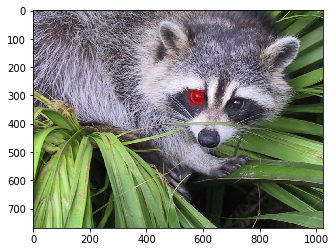

In [8]:
%matplotlib inline
import numpy as np
import scipy.ndimage as ndimage
from scipy.misc import face
import matplotlib.pyplot as plt
A=face()
A=A[:,:,0]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(face())
rect=plt.Rectangle((550,280),50,50,color='r',alpha=0.5)
ax.add_patch(rect)

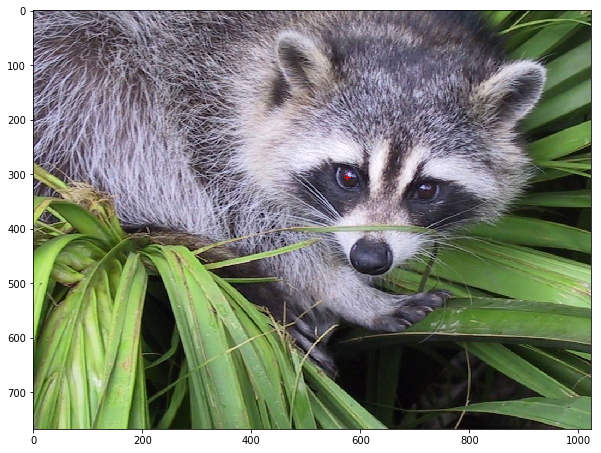

In [9]:
m,n=A.shape[0],A.shape[1]
r,t=51,51
A=A.astype(np.float64)
B=A[280:280+r,550:550+t]             
sum_squared_B=np.sum(B**2)
f=np.ones((r,t))
conv_squared_A=ndimage.correlate(A**2,f,mode='constant')
conv_B_A=ndimage.correlate(A,B,mode='constant')
sim=conv_squared_A-2*conv_B_A+sum_squared_B
indexes=np.argsort(sim.flatten())
plt.figure(figsize=(10,10))
plt.imshow(face())
for i in range(1):
    x=indexes[i]%n
    y=indexes[i]//n
    plt.plot(x,y,"r+")